##Dylan Keyer
##11 December 2015
###Differences-in-Differences Econometric Analysis of CPS Data for single women in the early-to-mid 1990s to examine the impact of the 1993 expansion of the Earned Income tax Credit (EITC)

In [5]:
import os
os.chdir('C:\Users\dylan_000\Downloads')
import pandas as pd
import numpy as np
import re
import ggplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
%matplotlib inline

In [6]:
eitc = pd.read_excel('EITC.xls')
eitc.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
0,11,1991,7.6,0,1,18714.3940,18714.39400,26,10,1,0.000000
1,12,1991,7.2,1,0,4838.5683,471.36564,22,9,1,4.367203
2,13,1991,6.4,2,0,8178.1938,0.00000,33,11,0,8.178194
3,14,1991,9.1,0,1,9369.5705,0.00000,43,11,0,9.369571
4,15,1991,8.6,3,1,14706.6080,14706.60800,23,7,1,0.000000


In [7]:
eitc.finc.mean()
print 'The annual family income for whites is',round(eitc[eitc.nonwhite==0].finc.mean(),2),'dollars, while the annual family income for\
 nonwhites is',round(eitc[eitc.nonwhite==1].finc.mean(),2),'dollars.'

The annual family income for whites is 16983.26 dollars, while the annual family income for nonwhites is 14106.64 dollars.


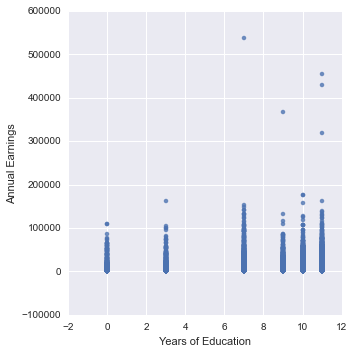

In [29]:
sns.lmplot(x='ed',y="earn",data=eitc,fit_reg=False).\
set(xlabel='Years of Education',ylabel='Annual Earnings');

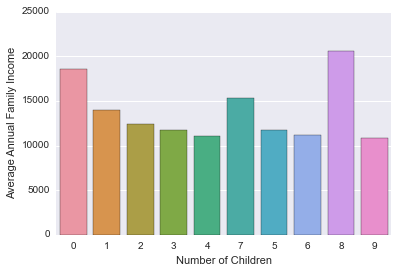

In [18]:
sns.barplot(x=eitc.children,y=eitc.finc,ci=None).\
set(xlabel='Number of Children', ylabel='Average Annual Family Income');

In [31]:
eitc.describe().to_csv('labor2.csv')

In [32]:
eitc[eitc.children==0].describe().to_csv('two_a.csv')
eitc[eitc.children==1].describe().to_csv('two_b.csv')
eitc[eitc.children>1].describe().to_csv('two_c.csv')

###Create an earnings variable that is conditional upon the person being employed, meaning that their earnings are greater than zero.

In [39]:
eitc['earncon'] = [earn if earn > 0 else None for earn in eitc.earn]
eitc.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,earncon
0,11,1991,7.6,0,1,18714.3940,18714.39400,26,10,1,0.000000,18714.39400
1,12,1991,7.2,1,0,4838.5683,471.36564,22,9,1,4.367203,471.36564
2,13,1991,6.4,2,0,8178.1938,0.00000,33,11,0,8.178194,NaN
3,14,1991,9.1,0,1,9369.5705,0.00000,43,11,0,9.369571,NaN
4,15,1991,8.6,3,1,14706.6080,14706.60800,23,7,1,0.000000,14706.60800


###Create treatment variable called 'ANYKIDS'; 1 if the woman has any children and 0 if she does not. Also create a binary variable ('POST93') to denote whether the woman's data is before or after the 1993 expansion of the Earned Income Tax Credit (EITC)

In [49]:
eitc['ANYKIDS'] = [1 if children > 0 else 0 for children in eitc.children]
eitc['POST93'] = [1 if year > 1993 else 0 for year in eitc.year]
eitc['emp'] = [1 if earn > 0 else 0 for earn in eitc.earn]
eitc.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,earncon,ANYKIDS,POST93,emp
0,11,1991,7.6,0,1,18714.3940,18714.39400,26,10,1,0.000000,18714.39400,0,0,1
1,12,1991,7.2,1,0,4838.5683,471.36564,22,9,1,4.367203,471.36564,1,0,1
2,13,1991,6.4,2,0,8178.1938,0.00000,33,11,0,8.178194,NaN,1,0,0
3,14,1991,9.1,0,1,9369.5705,0.00000,43,11,0,9.369571,NaN,0,0,0
4,15,1991,8.6,3,1,14706.6080,14706.60800,23,7,1,0.000000,14706.60800,1,0,1


In [78]:
eitc.groupby(['POST93','ANYKIDS'])['work'].describe()


POST93  ANYKIDS       
0       0        count    3154.000000
                 mean        0.575460
                 std         0.494351
                 min         0.000000
                 25%         0.000000
                 50%         1.000000
                 75%         1.000000
                 max         1.000000
        1        count    4247.000000
                 mean        0.445962
                 std         0.497130
                 min         0.000000
                 25%         0.000000
                 50%         0.000000
                 75%         1.000000
                 max         1.000000
1       0        count    2773.000000
                 mean        0.573386
                 std         0.494674
                 min         0.000000
                 25%         0.000000
                 50%         1.000000
                 75%         1.000000
                 max         1.000000
        1        count    3572.000000
                 mean      

In [56]:
eitc.groupby(['POST93','ANYKIDS'])['earn'].describe()

POST93  ANYKIDS       
0       0        count      3154.000000
                 mean      13798.558655
                 std       18808.726569
                 min           0.000000
                 25%           0.000000
                 50%        8007.840300
                 75%       20033.040000
                 max      176050.170000
        1        count      4247.000000
                 mean       7185.022186
                 std       13058.747396
                 min           0.000000
                 25%           0.000000
                 50%         530.286340
                 75%       10605.727000
                 max      162443.620000
1       0        count      2773.000000
                 mean      13716.690362
                 std       23825.056364
                 min           0.000000
                 25%           0.000000
                 50%        7160.611900
                 75%       18413.002000
                 max      537880.610000
        1        

In [73]:
import statsmodels.api as sm


In [76]:
X = eitc[['ANYKIDS', 'POST93']]
y = eitc.earn

## fit a OLS model with intercept on TV and Radio
est = sm.OLS(y, X).fit(intercept=True)

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1120.
Date:                Fri, 11 Dec 2015   Prob (F-statistic):               0.00
Time:                        15:20:13   Log-Likelihood:            -1.5526e+05
No. Observations:               13746   AIC:                         3.105e+05
Df Residuals:                   13744   BIC:                         3.105e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ANYKIDS     3924.7608    255.264     15.375      0.000      3424.409  4425.113
POST93      8723.4231    283.367     30.785      0.000      8167.985  9278.861
==============================================================================
Omnibus:                    16334.654   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5777154.336
Skew:                           5.902   Prob(JB):                         0.00
Kurtosis:                     102.737   Cond. No.                         1.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Codebook

#####state = State of Residence

#####year = Year (tax year)

#####urate = State Unemployment Rate

#####children = Number of Children

#####nonwhite = Dummy =1 if Hispanic/Black

#####finc = Annual Family Income ('97 dollars)

#####earn = Annual earnings ('97 dollars)

#####age = Age of woman

#####ed = Years of education

#####work = Dummy = 1 if employed last year

#####unearn = Unearned Income ('97 dollars)